In [56]:
import os
import json
import h5py
from PIL import Image
import pandas as pd

In [40]:
# Open and read the JSON file
with open('WORDMAP.json', 'r') as file:
    word_map = json.load(file)

with open('TRAIN_CAPTIONS.json', 'r') as file:
    image_descriptions  = json.load(file)

In [43]:
# Reverse the dictionary to map integers back to words
reversed_dict = {value: key for key, value in word_map.items()}

# Function to convert a list of integers into a descriptive string
def integers_to_description(integers, start_token, end_token, mapping):
    
    # Filter out start and end tokens and convert the rest to words
    words = [mapping[i] for i in integers[1:integers.index(end_token)]]
    # Join the words into a single string
    return ' '.join(words)

# Process each image description
descriptions = []
for desc_list in image_descriptions:
    description = integers_to_description(desc_list, 15805, 15806, reversed_dict)
    descriptions.append(description)

In [21]:
read h5py file
f = h5py.File('C:/Users/Esra/Downloads/TRAIN_IMAGES.hdf5', 'r')

In [23]:
list(f.keys())
dset=f["images"]
dset.shape

(888293, 3, 256, 256)

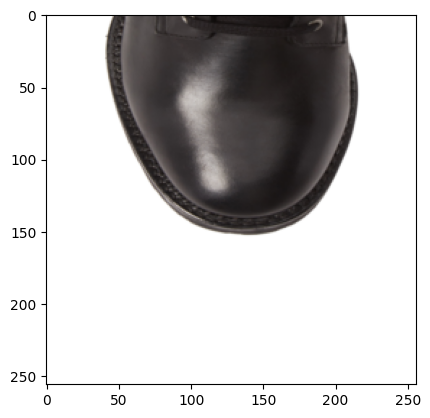

In [52]:
import numpy as np
import matplotlib.pyplot as plt
img_data = dset[5]  # Assuming you want the first image

# Rearrange the axes from (3, 256, 256) to (256, 256, 3)
img_data = np.transpose(img_data, (1, 2, 0))

# Visualize the image
plt.imshow(img_data)
plt.show()

In [33]:
output_folder = 'Extracted_Images'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [54]:
image_paths = []
for i in range(10000):
        # Read the image
        image_data = dset[i]
        image_data = np.transpose(image_data, (1, 2, 0))
        # Convert the image data to a PIL image (adjust as necessary for your data's shape and dtype)
        image = Image.fromarray(image_data.astype('uint8'))
        
        # Define the output path for the JPEG
        output_path = os.path.join(output_folder, f'image_{i+1}.jpeg')
        
        # Save the image as a JPEG
        image.save(output_path, 'JPEG')
        image_paths.append(output_path)

print("Finished saving the first 10,000 images as JPEGs.")

Finished saving the first 10,000 images as JPEGs.


In [57]:

# Assuming image_paths is already populated
responses = []

for ix in range(len(image_paths)):
    
    
    # Store the response and corresponding filename
    responses.append({
        "filename": os.path.basename(image_paths[ix]),
        "description": descriptions[ix]
    })

# Convert the responses list to a DataFrame
responses_df = pd.DataFrame(responses)

# Specify the filename
csv_filename = 'large_fashion_descriptions.csv'

# Save to CSV
responses_df.to_csv(csv_filename, index=False)